<a href="https://colab.research.google.com/github/vitorgaboardi/air-trafic-analysis/blob/main/flight_routes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by **Vitor Gaboardi dos Santos**

This notebook was designed to create a flight route dataset using information from [ANAC](https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos).

We will focus on analysing information from years 2019 and 2020.

#1. Pre-processing Dataset

Importing Libraries

In [1]:
import pandas as pd
pd.__version__

'1.3.1'

The first step is to download the datasets using the links below.

In [2]:
!gdown https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2019.csv
!gdown https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2020.csv#!gdown https://sistemas.anac.gov.br/dadosabertos/Aerodromos/Lista%20de%20aer%C3%B3dromos%20p%C3%BAblicos/AerodromosPublicos.csv

The datasets have information separated by comma. Thus, when using pandas to read the datasets, we must use "sep=','.

In [3]:
airports = pd.read_csv("AerodromosPublicos.csv", sep=';', header=None, encoding="ISO-8859-1", skiprows=2)
routes2019 = pd.read_csv("resumo_anual_2019.csv", sep=';',header=None, encoding="ISO-8859-1")
routes2020 = pd.read_csv("resumo_anual_2020.csv", sep=';', header=None, encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


First, we will work on the routes dataset. 

Thus, some operations will be made to consider only flights within Brazil which are *regular* and count the total number of flights for every two routes.

In [4]:
routes2019brasil = routes2019[[5,11,30]].loc[(routes2019[9]=='BRASIL') & (routes2019[15]=='BRASIL') & (routes2019[18] == "REGULAR") & (routes2019[5] != routes2019[11])].reset_index(drop=True).dropna()
routes2019brasil = routes2019brasil.rename(columns={5: "sigla_origem", 11: "sigla_destino", 30: "flights"})
routes2019brasil['flights'] = routes2019brasil['flights'].astype(str).astype(float).astype(int)
routes2019brasil = routes2019brasil.groupby(['sigla_origem','sigla_destino']).agg({'flights':'sum'}).reset_index()
routes2019brasil = routes2019brasil.loc[(routes2019brasil['flights'] > 15)].reset_index(drop=True)

routes2020brasil = routes2020[[5,11,30]].loc[(routes2020[9]=='BRASIL') & (routes2020[15]=='BRASIL') & (routes2020[18] == "REGULAR") & (routes2020[5] != routes2020[11])].reset_index(drop=True).dropna()
routes2020brasil = routes2020brasil.rename(columns={5: "sigla_origem", 11: "sigla_destino", 30: "flights"})
routes2020brasil['flights'] = routes2020brasil['flights'].dropna().astype(str).astype(float).astype(int)
routes2020brasil = routes2020brasil.groupby(['sigla_origem','sigla_destino']).agg({'flights':'sum'}).reset_index()
routes2020brasil = routes2020brasil.loc[(routes2020brasil['flights'] > 15)].reset_index(drop=True)

In [5]:
routes2019brasil.head()

,sigla_origem,sigla_destino,flights
0,SBAE,SBGR,278
1,SBAE,SBKP,542
2,SBAE,SBML,171
3,SBAR,SBBR,543
4,SBAR,SBGL,595


In [6]:
routes2020brasil.head()

,sigla_origem,sigla_destino,flights
0,SBAE,SBGR,162
1,SBAE,SBKP,465
2,SBAE,SBML,121
3,SBAQ,SBKP,41
4,SBAR,SBBR,287


Now, let's will work on the airports dataset. 

First, we will filter only the useful information, which will be the **OACI code**, **name**, **city**, **state**, **latitude** and **longitude**. After, the airports that did not have a flight will be disregarded from the dataset. To do this, the information from the two previous datasets will be used  

In [7]:
airports = airports[[0,2,3,4,7,8]].reset_index(drop=True)
airports = airports.rename(columns={0: 'OACI_Code', 2: 'name', 3: 'city', 4: 'state', 7: 'latitude', 8: 'longitude'})

airports2019 = airports[(airports.OACI_Code.isin(routes2019brasil.sigla_origem)) | (airports.OACI_Code.isin(routes2019brasil.sigla_destino))].reset_index(drop=True)
airports2019['latitude'] = airports2019['latitude'].astype(str).str.replace(',','.').astype(float)
airports2019['longitude'] = airports2019['longitude'].astype(str).str.replace(',','.').astype(float)

airports2020 = airports[(airports.OACI_Code.isin(routes2020brasil.sigla_origem)) | (airports.OACI_Code.isin(routes2020brasil.sigla_destino))].reset_index(drop=True)
airports2020['latitude'] = airports2020['latitude'].astype(str).str.replace(',','.').astype(float)
airports2020['longitude'] = airports2020['longitude'].astype(str).str.replace(',','.').astype(float)

In [35]:
airports2019.tail()

,OACI_Code,name,city,state,latitude,longitude
143,SNUI,Araçuaí,ARAÇUAÍ,Minas Gerais,-16.851944,-42.046111
144,SSVL,Telêmaco Borba,TELÊMACO BORBA,Paraná,-24.316389,-50.652222
145,SBSM,Santa Maria,SANTA MARIA,Rio Grande do Sul,-29.710833,-53.692222
146,SBCH,Serafin Enoss Bertaso,CHAPECÓ,Santa Catarina,-27.133889,-52.661944
147,SBMO,Zumbi dos Palmares,MACEIÓ,Alagoas,-9.517222,-35.783611


In [37]:
airports2020.head()

,OACI_Code,name,city,state,latitude,longitude
0,SBRB,Plácido de Castro,RIO BRANCO,Acre,-9.868333,-67.898056
1,SBIZ,Prefeito Renato Moreira,IMPERATRIZ,Maranhão,-5.530556,-47.458333
2,SBBE,Aeroporto Internacional de Bélem,BELÉM,Pará,-1.384722,-48.478889
3,SBJP,Internacional Presidente Castro Pinto,BAYEUX,Paraíba,-7.148333,-34.950278
4,SBKG,Presidente João Suassuna,CAMPINA GRANDE,Paraíba,-7.269167,-35.895000


In [10]:
print(len(routes2019brasil))
print(len(routes2020brasil))
print()
print(len(airports2019))
print(len(airports2020))


868
849

148
146


To see all the routes from a specific Source Airport, you can change the *SourceAirportCode* variable below and run the cell.

In [61]:
SourceAirportCode = "SBSP"
i = 0

for index, route in routes2020brasil.iterrows():
  if(route["sigla_origem"] == SourceAirportCode):
    print(route["sigla_origem"], route["sigla_destino"], route['flights'])
    i+=1

print(i)

SBSP SBAR 86
SBSP SBAU 55
SBSP SBBR 2807
SBSP SBCF 2985
SBSP SBCG 301
SBSP SBCN 48
SBSP SBCT 1840
SBSP SBCX 137
SBSP SBCY 286
SBSP SBDN 95
SBSP SBDO 125
SBSP SBFI 94
SBSP SBFL 1074
SBSP SBFZ 383
SBSP SBGL 527
SBSP SBGO 820
SBSP SBIL 178
SBSP SBJA 83
SBSP SBJR 142
SBSP SBJV 193
SBSP SBLO 311
SBSP SBME 64
SBSP SBMG 176
SBSP SBML 64
SBSP SBMO 110
SBSP SBNF 973
SBSP SBPA 2241
SBSP SBPG 90
SBSP SBPS 134
SBSP SBRF 1043
SBSP SBRJ 7128
SBSP SBRP 749
SBSP SBSR 370
SBSP SBSV 1253
SBSP SBUL 363
SBSP SBUR 62
SBSP SBVT 768
SBSP SBZM 65
SBSP SIMK 113
SBSP SJTC 68
SBSP SNBA 113
41


#2. Creating Networkx Graph

In [12]:
import networkx as nx
nx.__version__

'2.5.1'

Now, we will create two Graphs using the pandas DataFrame with information on 2019 and 2020 flights and airports.

In [13]:
G2019 = nx.from_pandas_edgelist(routes2019brasil, source='sigla_origem', target='sigla_destino', edge_attr='flights')
nx.set_node_attributes(G2019, airports2019.set_index('OACI_Code').to_dict('index'))

G2020 = nx.from_pandas_edgelist(routes2020brasil, source='sigla_origem', target='sigla_destino',edge_attr='flights')
nx.set_node_attributes(G2020, airports2020.set_index('OACI_Code').to_dict('index'))

print(nx.info(G2019))
print(nx.info(G2020))

Name: 
Type: Graph
Number of nodes: 155
Number of edges: 445
Average degree:   5.7419
Name: 
Type: Graph
Number of nodes: 153
Number of edges: 444
Average degree:   5.8039


There are some routes that have airports that are not included in the *airport* dataset. Thus, instead of manually add these information, we decided to delete these cases for now.

In further work, we will reconsider theses cases.

In [14]:
# 2019 dataset
node2019_rmv = []

for node in G2019.nodes():
  if(G2019.nodes[node] == {}):
    node2019_rmv.append(node)

# 2020 dataset
node2020_rmv = []

for node in G2020.nodes():
  if(G2020.nodes[node] == {}):
    node2020_rmv.append(node)

G2019.remove_nodes_from(node2019_rmv)
G2020.remove_nodes_from(node2020_rmv)

print(node2019_rmv)
print(node2020_rmv)

['SBBV', 'SBFE', 'SBQV', 'SWSI', 'SSZW', 'SNAT', 'SJTC']
['SBBV', 'SWSI', 'SBQV', 'SNAT', 'SJTC', 'SNRJ', 'SDWQ']


In [52]:
G2019.edges('SBSN')

EdgeDataView([('SBSN', 'SBBE'), ('SBSN', 'SBBR'), ('SBSN', 'SBEG'), ('SBSN', 'SBHT'), ('SBSN', 'SBIH'), ('SBSN', 'SBTB')])

In [59]:
G2020.nodes['SBBR']

{'city': 'BRASÍLIA',
 'latitude': -15.871111,
 'longitude': -47.918611,
 'name': 'Presidente Juscelino Kubitschek',
 'state': 'Distrito Federal'}

#3. Examples of Graph capabilities

## 3.1 - Is there a direct flight between Natal (SBSG) and Foz do Iguaçu (SBFI)? A direct flight is one with no intermediate stops. Consider the 2019 dataset.

In [17]:
"SBSG" in list(nx.neighbors(G2019, "SBFI"))

False

In [18]:
"SBFI" in list(nx.neighbors(G2019, "SBSG"))

False

##3.2 - If you wanted to fly from Natal to Foz do Iguaçu, what would be an itinerary with the fewest number of flights?

In [19]:
nx.shortest_path(G2019, "SBSG", "SBFI")

['SBSG', 'SBBR', 'SBFI']

In [20]:
nx.shortest_path_length(G2019, "SBSG", "SBFI")

2

##3.3 - Is it possible to travel from any airport in Brazil to any other airport in Brazil, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [21]:
nx.is_connected(G2019)

True

*PS: The graph was constructed based on the connections between the airports and **NOT** the TOTAL number of airports. Therefore, there are airports that are not represented in the graph (the ones that do not connect with any other).*

##3.4 - Draw the graph using latitude and longitude information

In [22]:
!pip install nxviz==0.6.3
!pip install seaborn

In [23]:
from nxviz import GeoPlot
import matplotlib.pyplot as plt

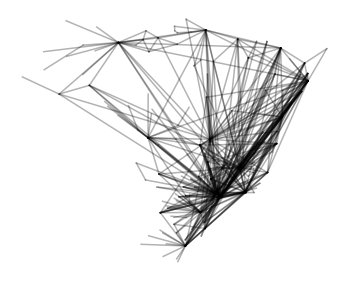

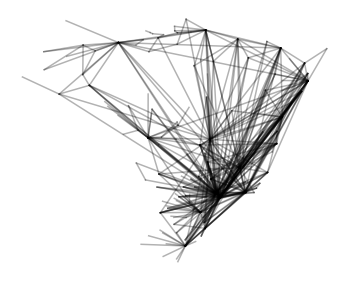

In [24]:
g2019 = GeoPlot(G2019, node_lat = 'latitude', node_lon = 'longitude', node_size=0.005)
g2020 = GeoPlot(G2020, node_lat = 'latitude', node_lon = 'longitude', node_size=0.005)

g2019.draw()
g2020.draw()
plt.show()

# 4.0 Graph Analysis

In [25]:
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

##4.1 - Basic Information

First, we will compare the **Eccentricity**, **Diameter** and **Radius** of the two Graphs

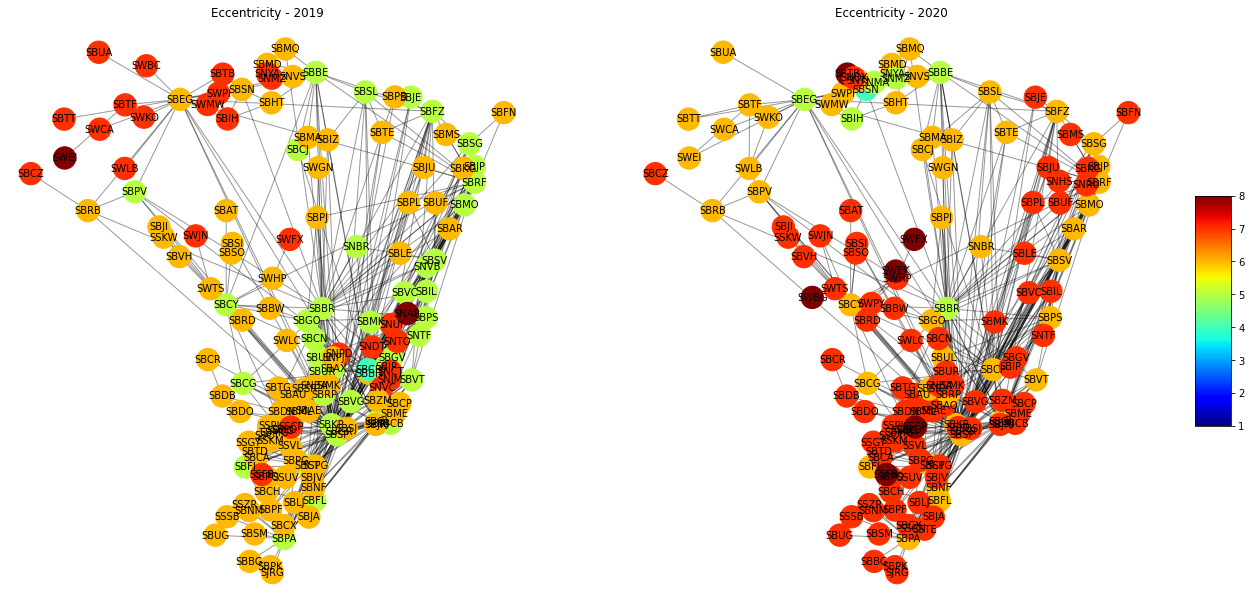

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

# max value of metrics 
max_centrality = max([max([v for k, v in nx.eccentricity(G2019).items()]),
                      max([v for k, v in nx.eccentricity(G2020).items()])])

# getting positions based on longitude and latitude
pos1 = {}
pos2 = {}

for node in G2019.nodes():
  pos1[node] = np.array([2*G2019.nodes[node]['longitude'],2*G2019.nodes[node]['latitude']])

for node in G2020.nodes():
  pos2[node] = np.array([2*G2020.nodes[node]['longitude'],2*G2020.nodes[node]['latitude']])

# colors
color1 = list(dict(nx.eccentricity(G2019)).values())
color2 = list(dict(nx.eccentricity(G2020)).values())

# draw edges
nx.draw_networkx_edges(G2019,pos=pos1,alpha=0.4, ax=ax[0])
nx.draw_networkx_edges(G2020,pos=pos2,alpha=0.4, ax=ax[1])  

# draw nodes
nodes = nx.draw_networkx_nodes(G2019,pos=pos1,node_color=color1,cmap=plt.cm.jet,vmin=1,vmax=max_centrality,ax=ax[0],node_size=500)
nodes = nx.draw_networkx_nodes(G2020,pos=pos2,node_color=color2,cmap=plt.cm.jet,vmin=1,vmax=max_centrality,ax=ax[1],node_size=500)

# draw labels
nx.draw_networkx_labels(G2019, pos=pos1,font_color='black', ax=ax[0], font_size=10)
nx.draw_networkx_labels(G2020, pos=pos2,font_color='black', ax=ax[1], font_size=10)     

# eliminate axis and titles
ax[0].axis("off")
ax[1].axis("off")
ax[0].set_title("Eccentricity - 2019")
ax[1].set_title("Eccentricity - 2020")

# unique colorbar
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=1, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.show()

In [27]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (G2019): {}".format(nx.diameter(G2019)))
print("Diameter of network (G2020): {}".format(nx.diameter(G2020)))

# periphery
print("Periphery of network (G2019): {}".format(nx.periphery(G2019)))
print("Periphery of network (G2020): {}".format(nx.periphery(G2020)))

# who are in the periphery
print([G2019.nodes[k]['name'] for k in nx.periphery(G2019)])
print([G2020.nodes[k]['name'] for k in nx.periphery(G2020)])

print()

# radius
print("Radius of network(G2019): {}".format(nx.radius(G2019)))
print("Radius of network(G2020): {}".format(nx.radius(G2020)))

# center
print("Center of network (G2019): {}".format(nx.center(G2019)))
print("Center of network (G2020): {}".format(nx.center(G2020)))

# center
print([G2019.nodes[k]['name'] for k in nx.center(G2019)])
print([G2020.nodes[k]['name'] for k in nx.center(G2020)])

Diameter of network (G2019): 8
Diameter of network (G2020): 8
Periphery of network (G2019): ['SWEI', 'SNAR']
Periphery of network (G2020): ['SBTB', 'SSCP', 'SSFB', 'SWBG', 'SWEK', 'SWFX']
['Eirunepé', 'Cirilo Queiróz']
['Trombetas', 'Francisco Lacerda Júnior', 'Paulo Abdala', 'André Antônio Maggi', 'Canarana', 'São Félix do Araguaia']

Radius of network(G2019): 4
Radius of network(G2020): 4
Center of network (G2019): ['SBCF']
Center of network (G2020): ['SBSN']
['Tancredo Neves']
['Maestro Wilson Fonseca']


##4.2 - Degree x Closeness and Degree x *Betweenness*

Comparing Degree and Closeness centrality of both graphs

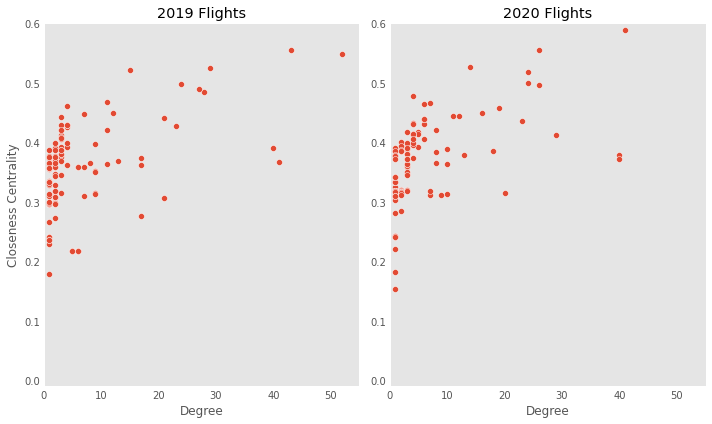

In [62]:
plt.style.use("ggplot")
#plt.style.use("default")

fig, ax = plt.subplots(1,2,figsize=(10,6))

# degree sequence
degree_sequence1 = sorted([d for n, d in G2019.degree()], reverse=True)  
degree_sequence2 = sorted([d for n, d in G2020.degree()], reverse=True)  

sns.scatterplot(x=degree_sequence1,y=[v for k,v in nx.closeness_centrality(G2019).items()],ax=ax[0])
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Closeness Centrality")
ax[0].set_title("2019 Flights")
ax[0].set_xlim(0,55)
ax[0].set_ylim(-0.01,0.6)
ax[0].grid(False)

sns.scatterplot(x=degree_sequence2,y=[v for k,v in nx.closeness_centrality(G2020).items()],ax=ax[1])
ax[1].set_xlabel("Degree")
ax[1].set_title("2020 Flights")
ax[1].set_xlim(0,55)
ax[1].set_ylim(-0.01,0.6)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('degree_vs_betweenness.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Now, let's compare the Degree and Betweenness centrality of both graphs.

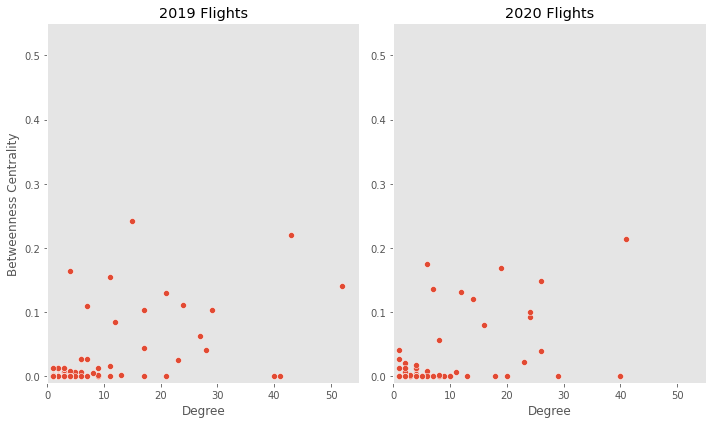

In [29]:
plt.style.use("ggplot")
#plt.style.use("default")

fig, ax = plt.subplots(1,2,figsize=(10,6))

# degree sequence
degree_sequence1 = sorted([d for n, d in G2019.degree()], reverse=True)  
degree_sequence2 = sorted([d for n, d in G2020.degree()], reverse=True)  

sns.scatterplot(x=degree_sequence1,y=[v for k,v in nx.betweenness_centrality(G2019).items()],ax=ax[0])
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Betweenness Centrality")
ax[0].set_title("2019 Flights")
ax[0].set_xlim(0,55)
ax[0].set_ylim(-0.01,0.55)
ax[0].grid(False)

sns.scatterplot(x=degree_sequence2,y=[v for k,v in nx.betweenness_centrality(G2020).items()],ax=ax[1])
ax[1].set_xlabel("Degree")
ax[1].set_title("2020 Flights")
ax[1].set_xlim(0,55)
ax[1].set_ylim(-0.01,0.55)
ax[1].grid(False)

plt.tight_layout()
plt.savefig('degree_vs_betweenness.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

##4.3 - Core Decomposition

In [30]:
# How many k-cores does both networks have?
print(set([v for k,v in nx.core_number(G2019).items()]))
print(set([v for k,v in nx.core_number(G2020).items()]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{1, 2, 3, 4, 5, 6, 7, 8, 9}


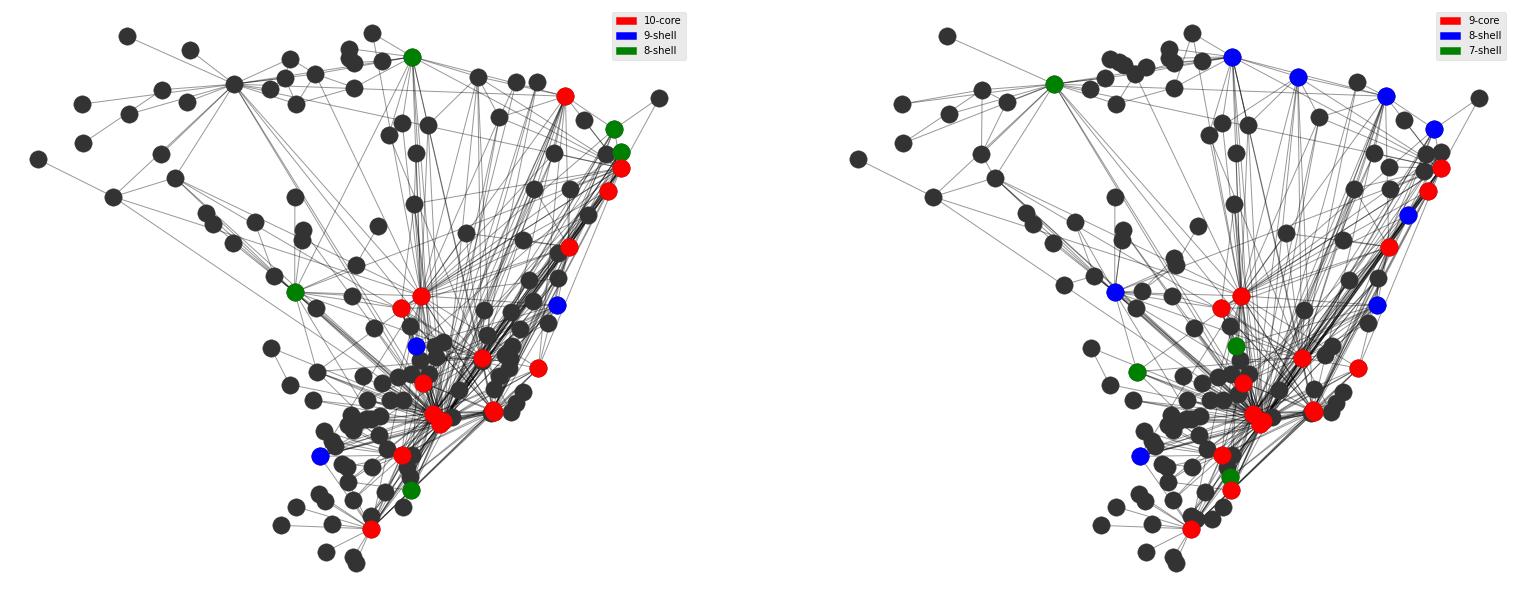

In [64]:
# the degree of network(g2)
fig, ax = plt.subplots(1,2,figsize=(24,10))

# Find k-cores
G2019_core_10 = nx.k_core(G2019, 10)
G2019_shell_9 = nx.k_shell(G2019, 9)
G2019_shell_8 = nx.k_shell(G2019, 8)

G2020_core_9 = nx.k_core(G2020, 9)
G2020_shell_8 = nx.k_shell(G2020, 8)
G2020_shell_7 = nx.k_shell(G2020, 7)

# draw edges
nx.draw_networkx_edges(G2019,pos=pos1,alpha=0.4, ax=ax[0])
nx.draw_networkx_edges(G2020,pos=pos2,alpha=0.4, ax=ax[1])

# draw nodes
nodes = nx.draw_networkx_nodes(G2019,pos=pos1,node_color="#333333",ax=ax[0])
nodes = nx.draw_networkx_nodes(G2019_shell_8,pos=pos1,node_color="green",ax=ax[0])
nodes = nx.draw_networkx_nodes(G2019_shell_9,pos=pos1,node_color="blue",ax=ax[0])
nodes = nx.draw_networkx_nodes(G2019_core_10,pos=pos1,node_color="red",ax=ax[0])

nodes = nx.draw_networkx_nodes(G2020,pos=pos2,node_color="#333333",ax=ax[1])
nodes = nx.draw_networkx_nodes(G2020_shell_7,pos=pos2,node_color="green",ax=ax[1])
nodes = nx.draw_networkx_nodes(G2020_shell_8,pos=pos2,node_color="blue",ax=ax[1])
nodes = nx.draw_networkx_nodes(G2020_core_9,pos=pos2,node_color="red",ax=ax[1])

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
green_patch = mpatches.Patch(color='green', label='8-shell')
ax[0].legend(handles=[red_patch,blue_patch,green_patch])

red_patch = mpatches.Patch(color='red', label='9-core')
blue_patch = mpatches.Patch(color='blue', label='8-shell')
green_patch = mpatches.Patch(color='green', label='7-shell')
ax[1].legend(handles=[red_patch,blue_patch,green_patch])

ax[0].axis("off")
ax[1].axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

##4.4 - Histogram and PDF

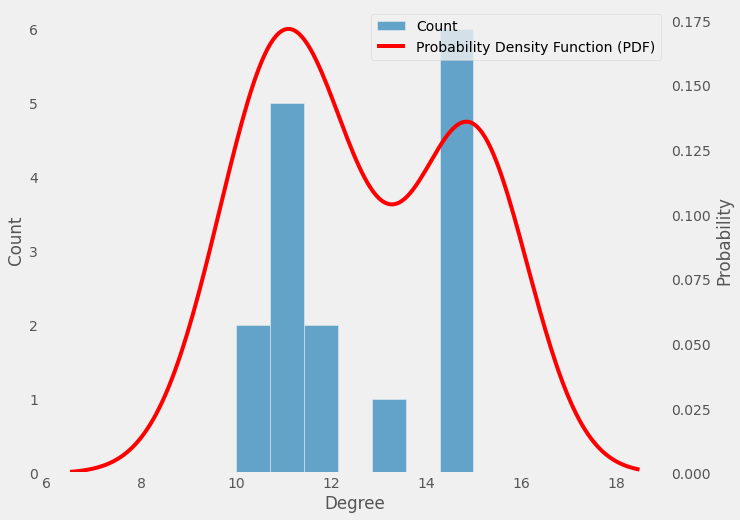

In [32]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(10,8))

degree_sequence = sorted([d for n, d in G2019_core_10.degree()], reverse=True)  

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

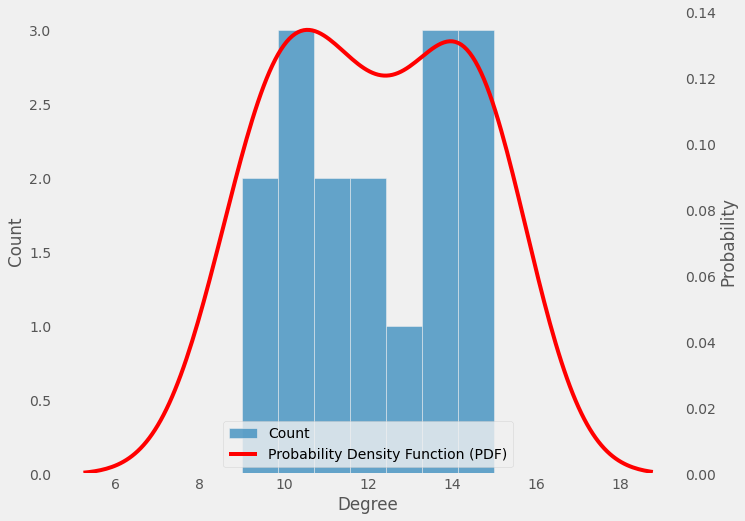

In [65]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(10,8))

degree_sequence = sorted([d for n, d in G2020_core_9.degree()], reverse=True)  

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()